### word embedding
https://wikidocs.net/22644

In [43]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

#### sparse representation

In [44]:
sentence = "An example can be written as this sentence, which is an example of an example sentence."

sentence = sentence.lower().replace('.', '').replace(',', '')
words = sentence.split()

vocab_df = pd.DataFrame(set(words), columns=["word"])
vocab_df

,word
0,this
1,sentence
2,can
3,written
4,example
5,as
6,which
7,is
8,an
9,be


,sentence,onehot
0,an,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,example,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
2,can,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,be,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
4,written,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
5,as,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
6,this,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
7,sentence,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8,which,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
9,is,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"


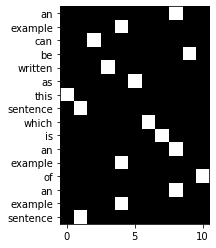

In [45]:
onehot_df = pd.DataFrame(dict.fromkeys(["sentence", "onehot"], words))
onehot_df.onehot = onehot_df.onehot.apply(lambda x: list(vocab_df.word).index(x))
onehot_df.onehot = onehot_df.onehot.apply(lambda x: [int(x==i) for i in range(len(vocab_df))])

display(onehot_df)
X = torch.tensor(onehot_df.onehot.tolist())

plt.imshow(X, cmap='binary_r')
plt.yticks(range(len(words)), words)
plt.show()

#### Word2Vec

In [46]:
print(words)

window_size = 5
for idx in range(len(words)):
    a = [i for i in range(-int(window_size/2)+idx, int(window_size/2)+idx+1) if i != idx and 0 <= i < len(words)]

['an', 'example', 'can', 'be', 'written', 'as', 'this', 'sentence', 'which', 'is', 'an', 'example', 'of', 'an', 'example', 'sentence']


In [47]:
sentences = [
    'I love to eat pizza',
    'I like playing soccer',
    'I enjoy reading books',
    'I prefer tea over coffee',
]

word_to_index = {}
index = 0
for sentence in sentences:
    words = sentence.lower().split()
    for word in words:
        if word not in word_to_index:
            word_to_index[word] = index
            index += 1

word_to_index

{'i': 0,
 'love': 1,
 'to': 2,
 'eat': 3,
 'pizza': 4,
 'like': 5,
 'playing': 6,
 'soccer': 7,
 'enjoy': 8,
 'reading': 9,
 'books': 10,
 'prefer': 11,
 'tea': 12,
 'over': 13,
 'coffee': 14}

In [48]:
context_size = 2  # Number of context words on each side
input_sequences = []
output_words = []
for sentence in sentences:
    words = sentence.lower().split()
    for i in range(context_size, len(words) - context_size):
        context_words = [words[j] for j in range(i - context_size, i)] + [words[j] for j in range(i + 1, i + context_size + 1)]
        target_word = words[i]
        input_sequences.append(context_words)
        output_words.append(target_word)

input_sequences, output_words

([['i', 'love', 'eat', 'pizza'], ['i', 'prefer', 'over', 'coffee']],
 ['to', 'tea'])